# `overlapping_spheres`
Generates overlapping spheres by inserting random points then dilating them to the specified radius.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps

Print the function argument and default values:

In [2]:
import inspect
print(inspect.signature(ps.generators.overlapping_spheres))

(shape: List[int], r: int, porosity: float, maxiter: int = 10, tol: float = 0.01)


## `radius`
Controls the size of the spheres:

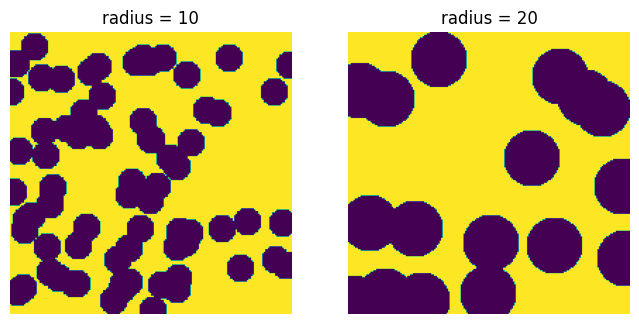

In [3]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

shape = [200, 200]
e = 0.6
r = 10
im1 = ps.generators.overlapping_spheres(shape=shape, r=r, porosity=e)
ax[0].imshow(im1)
ax[0].axis(False)
ax[0].set_title(f'radius = {r}')

r = 20
im2 = ps.generators.overlapping_spheres(shape=shape, r=r, porosity=e)
ax[1].imshow(im2)
ax[1].axis(False)
ax[1].set_title(f'radius = {r}');

## `porosity`
The number of spheres added is adjusted by meet the requested porosity:

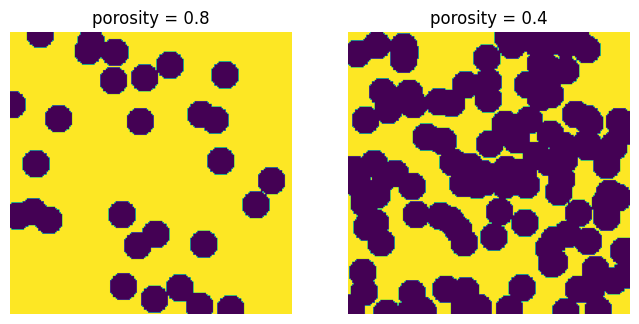

In [4]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])

r = 10
e = 0.8
im1 = ps.generators.overlapping_spheres(shape=shape, r=r, porosity=e)
ax[0].imshow(im1)
ax[0].axis(False)
ax[0].set_title(f'porosity = {e}')

e = 0.4
im2 = ps.generators.overlapping_spheres(shape=shape, r=r, porosity=e)
ax[1].imshow(im2)
ax[1].axis(False)
ax[1].set_title(f'porosity = {e}');

### `max_iter`
Because the spheres overlap randomly, it's not possible to match the desired porosity perfect so a trial and error approach is used.  This parameters control the maximum number of iterations used to match the desired porosity within the specified tolerance.

target porosity = 0.4
porosity =  0.26175
porosity =  0.406125


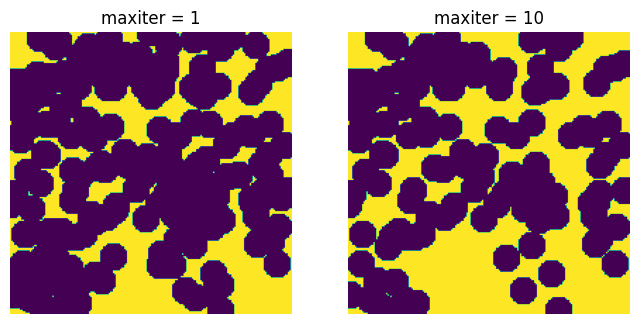

In [5]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
print('target porosity =', e)

np.random.seed(0)
mi = 1
im1 = ps.generators.overlapping_spheres(shape=shape, r=r, porosity=e, maxiter=mi)
ax[0].imshow(im1)
ax[0].axis(False)
ax[0].set_title(f'maxiter = {mi}')
print('porosity = ', ps.metrics.porosity(im1))

np.random.seed(0)
mi = 10
im2 = ps.generators.overlapping_spheres(shape=shape, r=r, porosity=e, maxiter=mi)
ax[1].imshow(im2)
ax[1].axis(False)
ax[1].set_title(f'maxiter = {mi}');
print('porosity = ', ps.metrics.porosity(im2))

## `tol`
Tolerance for porosity relative to input value. If requesting a porosity of 0.5, then ``tol=0.1`` will halt the iteration once the porosity is within 10% of the desired value, so between 0.45 and 0.55.  Note that the procedure may also stop early if ``maxiter`` is reached first.

target porosity = 0.4


porosity =  0.406125
porosity =  0.400225


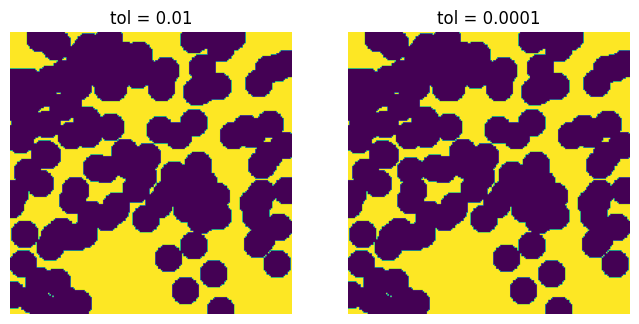

In [6]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
print('target porosity =', e)

np.random.seed(0)
t = 1e-2
mi=100
im1 = ps.generators.overlapping_spheres(shape=shape, r=r, porosity=e, maxiter=mi, tol=t)
ax[0].imshow(im1)
ax[0].axis(False)
ax[0].set_title(f'tol = {t}')
print('porosity = ', ps.metrics.porosity(im1))

np.random.seed(0)
t = 1e-4
im2 = ps.generators.overlapping_spheres(shape=shape, r=r, porosity=e, maxiter=mi, tol=t)
ax[1].imshow(im2)
ax[1].axis(False)
ax[1].set_title(f'tol = {t}');
print('porosity = ', ps.metrics.porosity(im2))